## Motif using logos in python using matplotlib

This is a proof of concept for plotting motif logos using matplotlib.
The coordinates for bases were picked of from [seqLogo](http://bioconductor.org/packages/release/bioc/html/seqLogo.html) package.

`seqLogo` is LGPL(v2.1) licensed and hence so is this notebook.

See [LICENCE](LICENSE)

In [18]:

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from matplotlib import transforms
import matplotlib.patheffects
import numpy as np

COLOR_SCHEME = {'G': 'orange', 
                'A': 'red', 
                'C': 'blue', 
                'T': 'darkgreen'}
BASES = list(COLOR_SCHEME.keys())

ALL_SCORES1 = [[('C', 0.02247014831444764),
              ('T', 0.057903843733384308),
              ('A', 0.10370837683591219),
              ('G', 0.24803586793255664)],
             [('T', 0.046608227674354567),
              ('G', 0.048827667087419063),
              ('A', 0.084338697696451109),
              ('C', 0.92994511407402669)],
             [('G', 0.0),
              ('T', 0.011098351287382456),
              ('A', 0.022196702574764911),
              ('C', 1.8164301607015951)],
             [('C', 0.020803153636453006),
              ('T', 0.078011826136698756),
              ('G', 0.11268374886412044),
              ('A', 0.65529933954826969)],
             [('T', 0.017393530660176126),
              ('A', 0.030438678655308221),
              ('G', 0.22611589858228964),
              ('C', 0.45078233627623127)],
             [('G', 0.022364103549245576),
              ('A', 0.043412671595594352),
              ('T', 0.097349627214363091),
              ('C', 0.1657574733649966)],
             [('C', 0.03264675899941203),
              ('T', 0.045203204768416654),
              ('G', 0.082872542075430544),
              ('A', 1.0949220710572034)],
             [('C', 0.0),
              ('T', 0.0076232429756614498),
              ('A', 0.011434864463492175),
              ('G', 1.8867526364762088)],
             [('C', 0.0018955903000026028),
              ('T', 0.0094779515000130137),
              ('A', 0.35637097640048931),
              ('G', 0.58005063180079641)],
             [('A', 0.01594690817903021),
              ('C', 0.017541598996933229),
              ('T', 0.2774762023151256),
              ('G', 0.48638069946042134)],
             [('A', 0.003770051401807444),
              ('C', 0.0075401028036148881),
              ('T', 0.011310154205422331),
              ('G', 1.8624053924928772)],
             [('C', 0.036479877757360731),
              ('A', 0.041691288865555121),
              ('T', 0.072959755514721461),
              ('G', 1.1517218549109602)],
             [('G', 0.011831087684038642),
              ('T', 0.068620308567424126),
              ('A', 0.10174735408273231),
              ('C', 1.0009100180696691)],
             [('C', 0.015871770937774379),
              ('T', 0.018757547471915176),
              ('A', 0.32176408355669878),
              ('G', 0.36505073156881074)],
             [('A', 0.022798100897300954),
              ('T', 0.024064662058262118),
              ('G', 0.24571286522646588),
              ('C', 0.34070495229855319)]]

ALL_SCORES2 = [[('A', 0.01653482213365913),
              ('G', 0.026710097292833978),
              ('C', 0.035613463057111966),
              ('T', 0.057235922770358522)],
             [('C', 0.020055669245080433),
              ('G', 0.023816107228533015),
              ('A', 0.031336983195438178),
              ('T', 0.058913528407423782)],
             [('T', 0.018666958185377256),
              ('G', 0.084001311834197651),
              ('A', 0.093334790926886277),
              ('C', 0.30333807051238043)],
             [('C', 0.0),
              ('G', 0.0),
              ('A', 0.32027512306044359),
              ('T', 0.82203948252180525)],
             [('C', 0.012698627658037786),
              ('A', 0.053334236163758708),
              ('T', 0.096509570201087178),
              ('G', 0.10920819785912497)],
             [('C', 0.0),
              ('G', 0.089472611853783468),
              ('A', 0.1930724782107959),
              ('T', 0.22132698721725386)],
             [('C', 0.020962390607965918),
              ('A', 0.026202988259957396),
              ('G', 0.066380903591892068),
              ('T', 0.07336836712788071)],
             [('G', 0.0),
              ('A', 0.10236420974570831),
              ('C', 0.15354631461856247),
              ('T', 0.29173799777526871)],
             [('G', 0.027681850851852024),
              ('C', 0.089966015268519078),
              ('A', 0.089966015268519078),
              ('T', 0.53287562889815143)],
             [('A', 0.034165612000664765),
              ('C', 0.06833122400132953),
              ('G', 0.072601925501412631),
              ('T', 0.28186629900548432)],
             [('G', 0.0),
              ('A', 0.037325935579058833),
              ('C', 0.23328709736911771),
              ('T', 0.72785574379164719)],
             [('A', 0.017470244196759552),
              ('C', 0.062892879108334396),
              ('G', 0.094339318662501587),
              ('T', 0.19916078384305891)],
             [('G', 0.0),
              ('A', 0.096447131567581681),
              ('C', 0.15844885900388422),
              ('T', 0.48223565783790845)],
             [('G', 0.0),
              ('A', 0.069291952024925829),
              ('C', 0.20787585607477749),
              ('T', 0.46425607856700307)],
             [('G', 0.0),
              ('A', 0.0),
              ('C', 0.21713201856318373),
              ('T', 1.1495224512168551)],
             [('G', 0.0),
              ('A', 0.048934292002649343),
              ('T', 0.27263391258618919),
              ('C', 0.42642740173737281)],
             [('A', 0.0),
              ('G', 0.053607190685875404),
              ('C', 0.2054942309625224),
              ('T', 0.69689347891638032)],
             [('G', 0.0),
              ('A', 0.0),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)],
             [('G', 0.0),
              ('C', 0.068079835765814778),
              ('A', 0.068079835765814778),
              ('T', 1.3207488138568066)],
             [('G', 0.020257705570431345),
              ('A', 0.020257705570431345),
              ('C', 0.048618493369035232),
              ('T', 0.055371061892512348)],
             [('G', 0.0),
              ('A', 0.076286510680262556),
              ('C', 0.20538675952378382),
              ('T', 0.34622339462580698)]]



In [19]:
def plotA(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot A"""
    x = np.array([ 0.  ,  0.4 ,  0.6 ,  1.  ,  0.8 ,  0.68,  0.32,  0.2 ,  0.])
    y = np.array([ 0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.3 ,  0.3 ,  0.  ,  0.])
    x = xstart + xscale*x
    y = ystart + yscale*y
    triy =  np.array([0.4 ,   0.4 , 0.75, 0.4])
    trix =  np.array([0.36,   0.64, 0.5, 0.36])

    trix = xstart + xscale*trix
    triy = ystart + yscale*triy
    
    return x, y, trix, triy

def plotT(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot T"""
    x = np.array([ 0. ,  1. ,  1. ,  0.6,  0.6,  0.4,  0.4,  0. ])
    y = np.array([ 1. ,  1. ,  0.9,  0.9,  0. ,  0. ,  0.9,  0.9])
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

def plotG(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot G"""
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 =0.5 + 0.5*np.cos(angle1)
    xl2 =0.5 + 0.5*np.sin(angle2)
    yl2 =0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    
    r1 = np.max(xl1)

    h1 = 0.4
    xadd = np.array([r1,0.5,0.5,r1-0.2,r1-0.2,r1,r1])
    yadd = np.array([h1,h1,h1-0.1,h1-0.1,0,0,h1])
    
    x = np.concatenate((x[::-1],xadd))
    y = np.concatenate((y[::-1],yadd))

    x = xstart + xscale*x
    y = ystart + yscale*y
    
    return x,y

def plotC(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot C"""
    
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 = 0.5 + 0.5*np.cos(angle1)
    xl2 = 0.5 + 0.5*np.sin(angle2)
    yl2 = 0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

In [20]:
class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)

def draw_logo(all_scores):
    fig = plt.figure()
    fig.set_size_inches(len(all_scores),2.5)
    ax = fig.add_subplot(111)
    ax.set_xticks(range(len(all_scores)))

    xshift = 0
    trans_offset = transforms.offset_copy(ax.transAxes, 
                                      fig=fig, 
                                      x=0, 
                                      y=0, 
                                      units='points')

   
    for scores in all_scores:
        yshift = 0
        for base, score in scores:
            txt = ax.text(0, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=80, 
                          color=COLOR_SCHEME[base],
                          weight='bold',
                          ha='center',
                          family='sans-serif'
                          )
            txt.set_clip_on(False) 
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, fig=fig, y=yshift, units='points')
        xshift += window_ext.width
        trans_offset = transforms.offset_copy(ax.transAxes, fig=fig, x=xshift, units='points')


    ax.set_yticks(range(0,3))


    seaborn.despine(ax=ax, offset=30, trim=True)
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))
    plt.show()





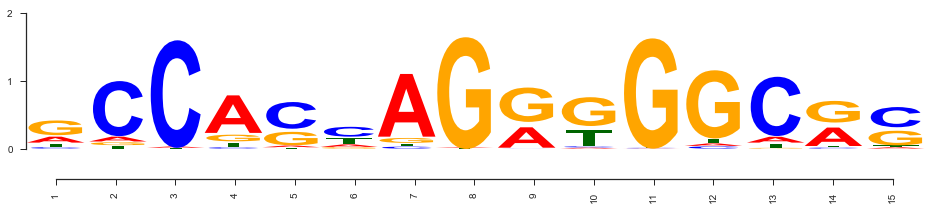

In [21]:
draw_logo(ALL_SCORES1)




In [17]:
draw_logo(ALL_SCORES2)

NameError: name 'ALL_SCORES2' is not defined

In [25]:
aa = [[('A', 0.062399999999999997), ('C', 0.0064000000000000003), ('E', 0.0112), ('D', 0.0112), ('G', 0.017600000000000001), ('F', 0.083199999999999996), ('I', 0.112), ('H', 0.064000000000000001), ('K', 0.073599999999999999), ('M', 0.0528), ('L', 0.059200000000000003), ('N', 0.0144), ('Q', 0.0448), ('P', 0.033599999999999998), ('S', 0.036799999999999999), ('R', 0.057599999999999998), ('T', 0.096000000000000002), ('W', 0.016), ('V', 0.089599999999999999), ('Y', 0.057599999999999998)], [('A', 0.038399999999999997), ('C', 0.081600000000000006), ('E', 0.0064000000000000003), ('D', 0.033599999999999998), ('G', 0.051200000000000002), ('F', 0.0608), ('I', 0.062399999999999997), ('H', 0.064000000000000001), ('K', 0.048000000000000001), ('M', 0.049599999999999998), ('L', 0.041599999999999998), ('N', 0.033599999999999998), ('Q', 0.043200000000000002), ('P', 0.051200000000000002), ('S', 0.035200000000000002), ('R', 0.040000000000000001), ('T', 0.070400000000000004), ('W', 0.087999999999999995), ('V', 0.048000000000000001), ('Y', 0.0528)], 
      [('A', 0.0), ('C', 0.0), ('E', 0.0), ('D', 0.0), ('G', 0.0), ('F', 1.0), ('I', 0.0), ('H', 0.0), ('K', 0.0), ('M', 0.0), ('L', 0.0), ('N', 0.0), ('Q', 0.0), ('P', 0.0), ('S', 0.0), ('R', 0.0), ('T', 0.0), ('W', 0.0), ('V', 0.0), ('Y', 0.0)], [('A', 0.036799999999999999), ('C', 0.076799999999999993), ('E', 0.025600000000000001), ('D', 0.028799999999999999), ('G', 0.025600000000000001), ('F', 0.040000000000000001), ('I', 0.057599999999999998), ('H', 0.051200000000000002), ('K', 0.020799999999999999), ('M', 0.086400000000000005), ('L', 0.038399999999999997), ('N', 0.049599999999999998), ('Q', 0.024), ('P', 0.056000000000000001), ('S', 0.051200000000000002), ('R', 0.0608), ('T', 0.099199999999999997), ('W', 0.028799999999999999), ('V', 0.0688), ('Y', 0.073599999999999999)], [('A', 0.051200000000000002), ('C', 0.056000000000000001), ('E', 0.012800000000000001), ('D', 0.0112), ('G', 0.0095999999999999992), ('F', 0.071999999999999995), ('I', 0.070400000000000004), ('H', 0.027199999999999998), ('K', 0.036799999999999999), ('M', 0.067199999999999996), ('L', 0.064000000000000001), ('N', 0.0224), ('Q', 0.043200000000000002), ('P', 0.065600000000000006), ('S', 0.051200000000000002), ('R', 0.054399999999999997), ('T', 0.073599999999999999), ('W', 0.049599999999999998), ('V', 0.086400000000000005), ('Y', 0.075200000000000003)], [('A', 0.057599999999999998), ('C', 0.024), ('E', 0.012800000000000001), ('D', 0.019199999999999998), ('G', 0.0224), ('F', 0.024), ('I', 0.040000000000000001), ('H', 0.041599999999999998), ('K', 0.0688), ('M', 0.036799999999999999), ('L', 0.1232), ('N', 0.020799999999999999), ('Q', 0.12), ('P', 0.033599999999999998), ('S', 0.054399999999999997), ('R', 0.081600000000000006), ('T', 0.070400000000000004), ('W', 0.056000000000000001), ('V', 0.032000000000000001), ('Y', 0.0608)], [('A', 0.0), ('C', 0.0), ('E', 0.0), ('D', 0.0), ('G', 0.0), ('F', 0.0), ('I', 0.0), ('H', 0.0), ('K', 0.0), ('M', 0.0), ('L', 0.0), ('N', 0.0), ('Q', 0.0), ('P', 0.0), ('S', 0.0), ('R', 0.0), ('T', 0.0), ('W', 1.0), ('V', 0.0), ('Y', 0.0)], [('A', 0.0224), ('C', 0.0528), ('E', 0.012800000000000001), ('D', 0.0047999999999999996), ('G', 0.020799999999999999), ('F', 0.062399999999999997), ('I', 0.062399999999999997), ('H', 0.040000000000000001), ('K', 0.065600000000000006), ('M', 0.0528), ('L', 0.043200000000000002), ('N', 0.017600000000000001), ('Q', 0.0528), ('P', 0.0848), ('S', 0.035200000000000002), ('R', 0.081600000000000006), ('T', 0.070400000000000004), ('W', 0.065600000000000006), ('V', 0.0688), ('Y', 0.083199999999999996)], [('A', 0.062399999999999997), ('C', 0.0064000000000000003), ('E', 0.0064000000000000003), ('D', 0.0095999999999999992), ('G', 0.0144), ('F', 0.0112), ('I', 0.033599999999999998), ('H', 0.1072), ('K', 0.11360000000000001), ('M', 0.051200000000000002), ('L', 0.032000000000000001), ('N', 0.0144), ('Q', 0.1024), ('P', 0.057599999999999998), ('S', 0.075200000000000003), ('R', 0.18240000000000001), ('T', 0.062399999999999997), ('W', 0.0064000000000000003), ('V', 0.0095999999999999992), ('Y', 0.041599999999999998)], [('A', 0.0), ('C', 0.0), ('E', 0.0), ('D', 0.0), ('G', 0.0), ('F', 0.0), ('I', 0.0), ('H', 0.0), ('K', 0.0), ('M', 0.0), ('L', 1.0), ('N', 0.0), ('Q', 0.0), ('P', 0.0), ('S', 0.0), ('R', 0.0), ('T', 0.0), ('W', 0.0), ('V', 0.0), ('Y', 0.0)], [('A', 0.0608), ('C', 0.0047999999999999996), ('E', 0.0080000000000000002), ('D', 0.0047999999999999996), ('G', 0.0144), ('F', 0.0112), ('I', 0.0528), ('H', 0.096000000000000002), ('K', 0.13919999999999999), ('M', 0.016), ('L', 0.054399999999999997), ('N', 0.0032000000000000002), ('Q', 0.075200000000000003), ('P', 0.15840000000000001), ('S', 0.048000000000000001), ('R', 0.11360000000000001), ('T', 0.092799999999999994), ('W', 0.0224), ('V', 0.0047999999999999996), ('Y', 0.019199999999999998)], [('A', 0.0224), ('C', 0.0080000000000000002), ('E', 0.0032000000000000002), ('D', 0.0064000000000000003), ('G', 0.0064000000000000003), ('F', 0.0032000000000000002), ('I', 0.027199999999999998), ('H', 0.13600000000000001), ('K', 0.19839999999999999), ('M', 0.027199999999999998), ('L', 0.038399999999999997), ('N', 0.0064000000000000003), ('Q', 0.1056), ('P', 0.092799999999999994), ('S', 0.038399999999999997), ('R', 0.14879999999999999), ('T', 0.104), ('W', 0.0064000000000000003), ('V', 0.0095999999999999992), ('Y', 0.0112)], [('A', 0.046399999999999997), ('C', 0.0095999999999999992), ('E', 0.0016000000000000001), ('D', 0.0095999999999999992), ('G', 0.0047999999999999996), ('F', 0.012800000000000001), ('I', 0.024), ('H', 0.16), ('K', 0.1792), ('M', 0.0144), ('L', 0.033599999999999998), ('N', 0.0064000000000000003), ('Q', 0.0688), ('P', 0.1072), ('S', 0.032000000000000001), ('R', 0.21759999999999999), ('T', 0.054399999999999997), ('W', 0.0047999999999999996), ('V', 0.0047999999999999996), ('Y', 0.0080000000000000002)]]

KeyError: 'E'

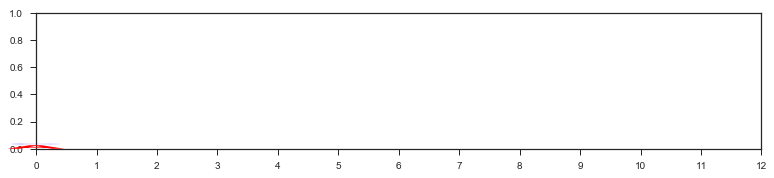

In [26]:
draw_logo(aa)